In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import math

In [2]:
class Gaussian:
    def __init__(self, width, amplitude, x0):
        self.width = width
        self.amplitude = amplitude
        self.x0 = x0
        
    def __call__(self, x):
        A = self.amplitude
        x0 = self.x0
        sigma = self.width
        return A*np.exp(-((x[0]-x0[0])**2 + (x[1]-x0[1])**2)/sigma**2)

# I. Linear part:

1. Numerical solution:

In [3]:
class propagate:
    def __init__(self, Lx, Nx, Ly, Ny, Lz, Nz, k, K, init_f, non_f):
        self.Lx = Lx
        self.Nx = Nx
        self.Ly = Ly
        self.Ny = Ny
        self.Lz = Lz
        self.Nz = Nz
        self.k = k
        self.K = K
        self.non_f = non_f
        self.dz = Lz/Nz
        self.dx = Lx/Nx
        self.dy = Ly/Ny
        self.matrix = np.zeros([Nz, 2*Nx, 2*Ny])
        
        kx = 2*np.pi*np.fft.fftfreq(2*Nx, d=self.dx)
        ky = 2*np.pi*np.fft.fftfreq(2*Ny, d=self.dy)
        kxy2 = np.zeros([2*Nx, 2*Ny])
        for i in range(2*Nx):
            for j in range(2*Ny):
                kxy2[i][j] = kx[i]**2 + ky[j]**2
        self.kxy2 = kxy2
                
        self.x = np.linspace(-Lx, Lx, 2*Nx)
        self.y = np.linspace(-Ly, Ly, 2*Ny)
        E = np.zeros([2*Nx, 2*Ny])
        for i in range(2*Nx):
            for j in range(2*Ny):
                x0 =(2*Lx)/(2*Nx-1)*i - Lx
                x1 =(2*Ly)/(2*Ny-1)*j - Ly
                E[i][j] = init_f([x0, x1])
        
        self.E = E
        self.matrix[0,:,:] = E
        
    def evolution(self):
        list_z =[]
        list_z1 = []
        E = self.E*(1+1j*0)
        list_z.append(np.abs(E)**2)
        list_z1.append(E)
        
        for l in range(Nz-1):
            #Linear
            Ek = np.fft.fft2(E)
            Ek *= np.exp(-1j/(2*self.k)*(self.kxy2)*self.dz)
            E = np.fft.ifft2(Ek)
            #print(np.abs(E)/list_z[-1])
        
            #Non-linear
            #if l == 0: E += non_f(E)*self.dz
            #else: E += (3/2)*non_f(list_z1[-1])*self.dz - (1/2)*non_f(list_z1[-2])*self.dz
            #E += non_f(E)*self.dz
            
            #Putting into list
            list_z.append(np.abs(E)**2)
            list_z1.append(E)
        
        list_z = np.asarray(list_z)
        self.matrix = list_z
        
        
        
        

In [4]:
cross = 5.1*1e-24
light = 3*1e8
lamb = 790*1e-9
omega = 2*np.pi*light/lamb
tau = 3.5*1e-13
beta = 6.5*1e-104
hbar = 6.62*1e-34
tp = 200*1e-15
f = 1/2
n2 = 5.57*1e-23
k = 2*np.pi/lamb
K = 7

const1 = -cross/2*(1 + omega*tau)*beta/(K*hbar*omega)*tp/(8*K)**(1/2)
const2 = -beta/2
const3 = 1j*omega/light*(1-f)*n2

#print(const1, const2, const3)
def non_f(E):
    const1 = -cross/2*(1 + omega*tau)*beta/(K*hbar*omega)*tp/(8*K)**(1/2)
    const2 = -beta/2
    const3 = 1j*omega/light*(1-f)*n2
    #print(const1, const2, const3)
    return const1*E*np.abs(E)**(2*K) + const2*E*np.abs(E)**(2*K - 2) + const3*E*np.abs(E)**2


In [5]:
w0 = 0.7*1e-3
Pcr = 2*1e9
p = 4
Pin = p*Pcr
AMP = (2*Pin/(math.pi*w0**2))**(1/2)
x0 = [0., 0.]

gauss = Gaussian(w0, AMP, x0)

Lx = 1600*1e-6
Nx = 256
Ly = 1600*1e-6
Ny = 256
Lz = 1.4
Nz = 512

#a = 34*1e-108 + 2*1e-16*1j
#b = 3.25*1e-104
#a = 1e-40
#b = 1e-40
#K = 7

init_f = gauss

#E = np.zeros([2*Nx, 2*Ny])
#for i in range(2*Nx):
#    for j in range(2*Ny):
#        x0 =(2*Lx)/(2*Nx - 1)*i - Lx
#        x1 =(2*Ly)/(2*Ny - 1)*j - Ly
#        E[i][j] = gauss([x0, x1])


Pro = propagate(Lx, Nx, Ly, Ny, Lz, Nz, k, K, init_f, non_f)
#print(Pro.E)
#print(non_f(Pro.E)*Pro.dz)
Pro.evolution()

#for i in range(25):
#    fig, ax = plt.subplots()
#    mesh = ax.pcolormesh(Pro.x, Pro.y, Pro.matrix[i*10])
#    ax.set_xlabel('x')
#    ax.set_ylabel('y')
#    plt.colorbar(mesh, ax=ax)
#    fig.show()
    


Position: z =  0.0
Position: z =  0.5988281249999999
Position: z =  0.828515625
Position: z =  1.397265625


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


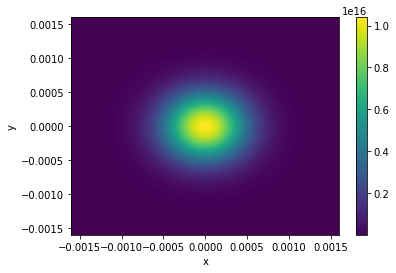

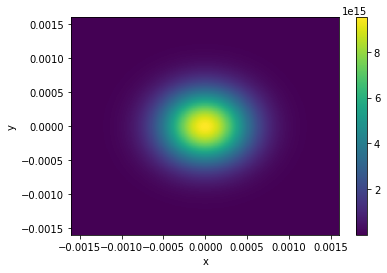

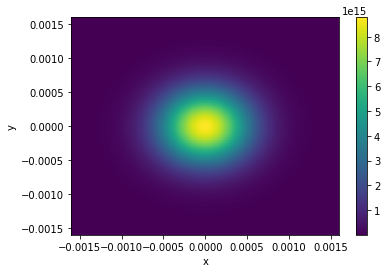

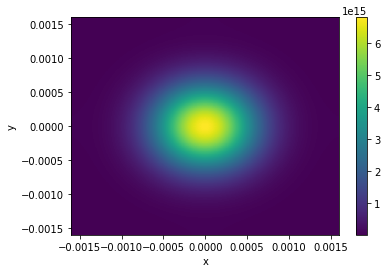

In [10]:
for i in [0, 219, 303, Nz-1]:
    print("Position: z = ",  i*Pro.dz)

    fig, ax = plt.subplots()
    mesh = ax.pcolormesh(Pro.x, Pro.y, Pro.matrix[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.colorbar(mesh, ax=ax)
    fig.show()

    

2. Analytical solution:

Position: z =  0.0
Position: z =  0.5988281249999999
Position: z =  0.828515625
Position: z =  1.397265625


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


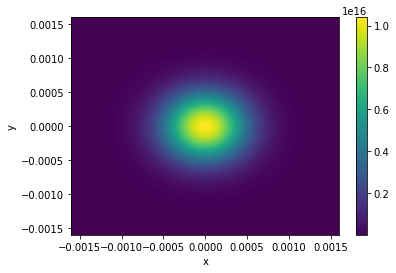

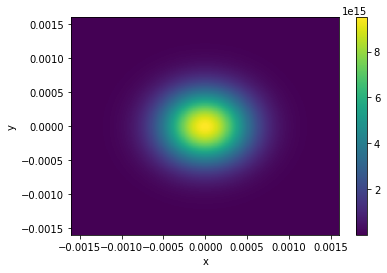

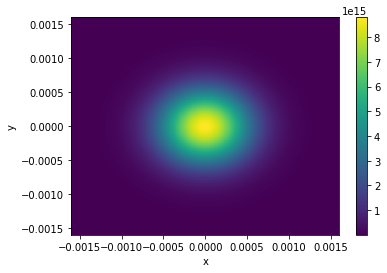

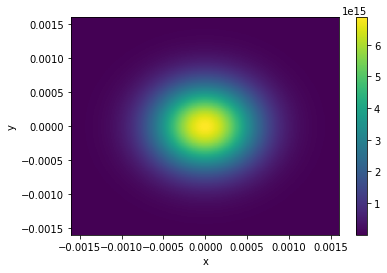

In [12]:
#Test fonction
E0 = (2*Pin/(np.pi*w0**2))**(1/2)

def w(z):
    return w0*(1 + (2*z/(k*w0**2))**2)**(1/2)

x = np.linspace(-Lx, Lx, 2*Nx)
y = np.linspace(-Ly, Ly, 2*Ny)

space_xy2 = np.zeros([2*Nx, 2*Ny])

for i in range(2*Nx):
    for j in range(2*Ny):
        space_xy2[i][j] = x[i]**2 + y[j]**2

def res_analytique(z):
    return (E0*w0/w(z)*np.exp(-space_xy2/w(z)**2))**2

#print(w(Lz)/w0)

for i in [0, 219, 303, Nz-1]:
    print("Position: z = ",  i*Pro.dz)
    fig, ax = plt.subplots()
    mesh = ax.pcolormesh(x, y, res_analytique(i*Pro.dz))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.colorbar(mesh, ax=ax)
    fig.show()


3. Comparison between analytical and numerical solution: 

Position: z =  0.0
Position: z =  0.5988281249999999


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


Position: z =  0.828515625
Position: z =  1.397265625


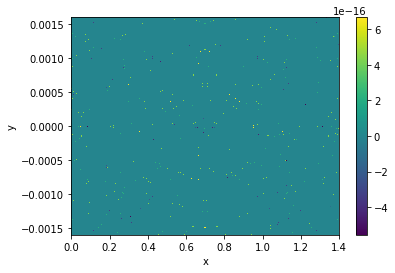

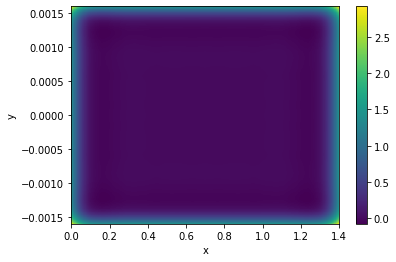

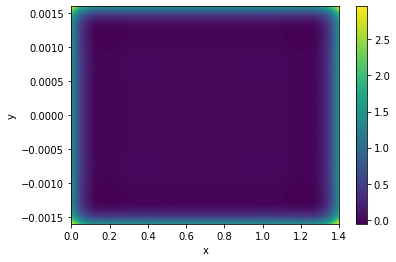

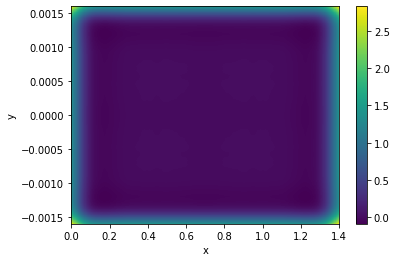

In [34]:
for i in [0, 219, 303, Nz-1]:
    print("Position: z = ",  i*Pro.dz)
    fig, ax = plt.subplots()
    mesh = ax.pcolormesh(x, y, np.log(Pro.matrix[i]/res_analytique(i*Pro.dz)))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.colorbar(mesh, ax=ax)
    fig.show()

Position:  0.0
Mean:  1.0
Standard deviation:  3.209238430557093e-17
------------
Position:  0.5988281249999999
Mean:  1.282014751967081
Standard deviation:  0.7967582858254472
------------
Position:  0.828515625
Mean:  1.3134363997933503
Standard deviation:  0.8520638863668453
------------
Position: 

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


 1.397265625
Mean:  1.3202192929040844
Standard deviation:  0.8529460484657838
------------


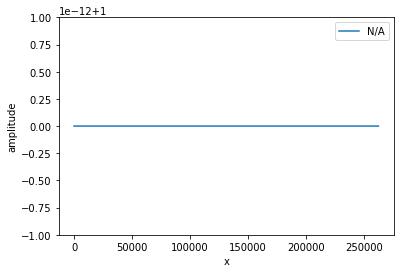

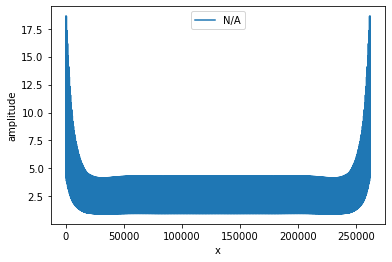

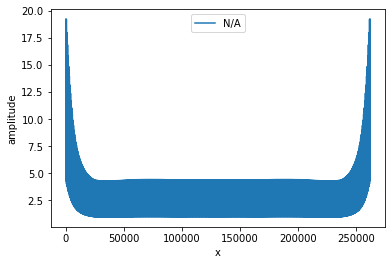

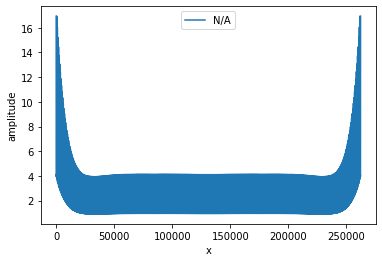

In [25]:
for i in [0, 219, 303, Nz-1]:
    A = (Pro.matrix[i]/res_analytique(i*Pro.dz)).flatten()
    print("Position: ", i*Pro.dz)
    print("Mean: ", np.mean(A))
    print("Standard deviation: ", np.std(A))
    print("------------")
    x = np.linspace(0, 2*Nx*2*Ny, 2*Nx*2*Ny)
    fig, ax = plt.subplots()
    ax.plot(x, A, label = 'N/A')
    ax.set_xlabel('x')
    ax.set_ylabel('amplitude')
    ax.legend()
    fig.show()

4. Energy conservation:

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


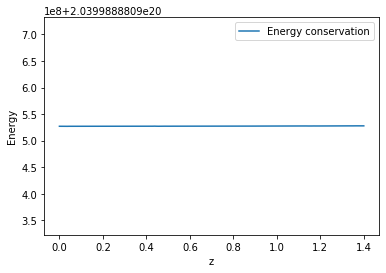

In [33]:
list_e = []
for i in range(Nz):
    E = np.sum(np.sum(Pro.matrix[i]))
    list_e.append(E)
list_e = np.asarray(list_e)
x = np.linspace(0, Lz, Nz)
fig, ax = plt.subplots()
ax.plot(x, list_e, label = 'Energy conservation')
ax.set_xlabel('z')
ax.set_ylabel('Energy')
ax.legend()
fig.show()

# II. Nonlinear part (Only Kerr Effect):

In [36]:
class propagate:
    def __init__(self, Lx, Nx, Ly, Ny, Lz, Nz, k, K, init_f, non_f):
        self.Lx = Lx
        self.Nx = Nx
        self.Ly = Ly
        self.Ny = Ny
        self.Lz = Lz
        self.Nz = Nz
        self.k = k
        self.K = K
        self.non_f = non_f
        self.dz = Lz/Nz
        self.dx = Lx/Nx
        self.dy = Ly/Ny
        self.matrix = np.zeros([Nz, 2*Nx, 2*Ny])
        
        kx = 2*np.pi*np.fft.fftfreq(2*Nx, d=self.dx)
        ky = 2*np.pi*np.fft.fftfreq(2*Ny, d=self.dy)
        kxy2 = np.zeros([2*Nx, 2*Ny])
        for i in range(2*Nx):
            for j in range(2*Ny):
                kxy2[i][j] = kx[i]**2 + ky[j]**2
        self.kxy2 = kxy2
                
        self.x = np.linspace(-Lx, Lx, 2*Nx)
        self.y = np.linspace(-Ly, Ly, 2*Ny)
        E = np.zeros([2*Nx, 2*Ny])
        for i in range(2*Nx):
            for j in range(2*Ny):
                x0 =(2*Lx)/(2*Nx-1)*i - Lx
                x1 =(2*Ly)/(2*Ny-1)*j - Ly
                E[i][j] = init_f([x0, x1])
        
        self.E = E
        self.matrix[0,:,:] = E
        
    def evolution(self):
        list_z =[]
        list_z1 = []
        E = self.E*(1+1j*0)
        list_z.append(np.abs(E)**2)
        list_z1.append(E)
        
        for l in range(Nz-1):
            #Linear
            Ek = np.fft.fft2(E)
            Ek *= np.exp(-1j/(2*self.k)*(self.kxy2)*self.dz)
            E = np.fft.ifft2(Ek)
            #print(np.abs(E)/list_z[-1])
        
            #Non-linear
            #if l == 0: E += non_f(E)*self.dz
            #else: E += (3/2)*non_f(list_z1[-1])*self.dz - (1/2)*non_f(list_z1[-2])*self.dz
            E += non_f(E)*self.dz
            
            #Putting into list
            list_z.append(np.abs(E)**2)
            list_z1.append(E)
        
        list_z = np.asarray(list_z)
        self.matrix = list_z
        
        
        
        

In [38]:
cross = 5.1*1e-24
light = 3*1e8
lamb = 790*1e-9
omega = 2*np.pi*light/lamb
tau = 3.5*1e-13
beta = 6.5*1e-104
hbar = 6.62*1e-34
tp = 200*1e-15
f = 1/2
n2 = 5.57*1e-23
k = 2*np.pi/lamb
K = 7
n0 =1 

const1 = -cross/2*(1 + omega*tau)*beta/(K*hbar*omega)*tp/(8*K)**(1/2)
const2 = -beta/2
const3 = 1j*omega/light*(1-f)*n2

#print(const1, const2, const3)
def non_f(E):
    #const1 = -cross/2*(1 + omega*tau)*beta/(K*hbar*omega)*tp/(8*K)**(1/2)
    #const2 = -beta/2
    const1 = 0
    const2 = 0
    const3 = 1j*omega/light*(1-f)*n2
    #print(const1, const2, const3)
    return const1*E*np.abs(E)**(2*K) + const2*E*np.abs(E)**(2*K - 2) + const3*E*np.abs(E)**2


In [ ]:
w0 = 0.7*1e-3
Pcr = 3.77*np.pi*n0/(2*k**2*(1-f)*n2)
p = 4
Pin = p*Pcr
AMP = (2*Pin/(math.pi*w0**2))**(1/2)
x0 = [0., 0.]

gauss = Gaussian(w0, AMP, x0)

Lx = 1600*1e-6
Nx = 256
Ly = 1600*1e-6
Ny = 256
Lz = 1.4
Nz = 512

#a = 34*1e-108 + 2*1e-16*1j
#b = 3.25*1e-104
#a = 1e-40
#b = 1e-40
#K = 7

init_f = gauss

#E = np.zeros([2*Nx, 2*Ny])
#for i in range(2*Nx):
#    for j in range(2*Ny):
#        x0 =(2*Lx)/(2*Nx - 1)*i - Lx
#        x1 =(2*Ly)/(2*Ny - 1)*j - Ly
#        E[i][j] = gauss([x0, x1])


Pro = propagate(Lx, Nx, Ly, Ny, Lz, Nz, k, K, init_f, non_f)
#print(Pro.E)
#print(non_f(Pro.E)*Pro.dz)
Pro.evolution()

#for i in range(25):
#    fig, ax = plt.subplots()
#    mesh = ax.pcolormesh(Pro.x, Pro.y, Pro.matrix[i*10])
#    ax.set_xlabel('x')
#    ax.set_ylabel('y')
#    plt.colorbar(mesh, ax=ax)
#    fig.show()
    
